In [104]:
import pandas as pd
df = pd.read_csv('./benchmark-results/benchmark-results-test.csv')

In [105]:
df.columns = ['build', 'time']

df

,build,time
0,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7255039
1,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7254039
2,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7253039
3,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7252039
4,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7251039
...,...,...
75,opencv-4.7.0-build-ip...,7163393
76,opencv-4.7.0-build-ip...,7167393
77,opencv-4.7.0-build-ip...,7167393
78,opencv-4.7.0-build-ip...,7167393


In [106]:
df.describe()

,time
count,80.000
mean,7132899.750
std,84780.249
min,7031446.000
25%,7063102.250
50%,7119857.000
75%,7189804.500
max,7257039.000


In [107]:
result = df.groupby('build', sort=False)['time'].aggregate(['describe', 'median'])
result.columns = result.columns.get_level_values(1)
result = result.rename(columns = {'time':'median'})
result = result.sort_values('median')

result

,count,mean,std,min,25%,50%,75%,max,median
build,,,,,,,,,
opencv-4.7.0-build-simplest,20.000,7037046.000,2303.316,7031446.000,7036196.000,7038446.000,7038446.000,7038446.000,7038446.000
opencv-4.7.0-aocc-build-ipp-tbb-eigen-openmp,20.000,7074671.000,1926.956,7071321.000,7074321.000,7074321.000,7074571.000,7079321.000,7074321.000
opencv-4.7.0-build-ipp-tbb-eigen-openmp,20.000,7165643.000,2552.089,7160393.000,7163393.000,7167393.000,7167393.000,7169393.000,7167393.000
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-all-aocc,20.000,7254239.000,1704.483,7251039.000,7253039.000,7255039.000,7255039.000,7257039.000,7255039.000


In [108]:
result = result.head(5)

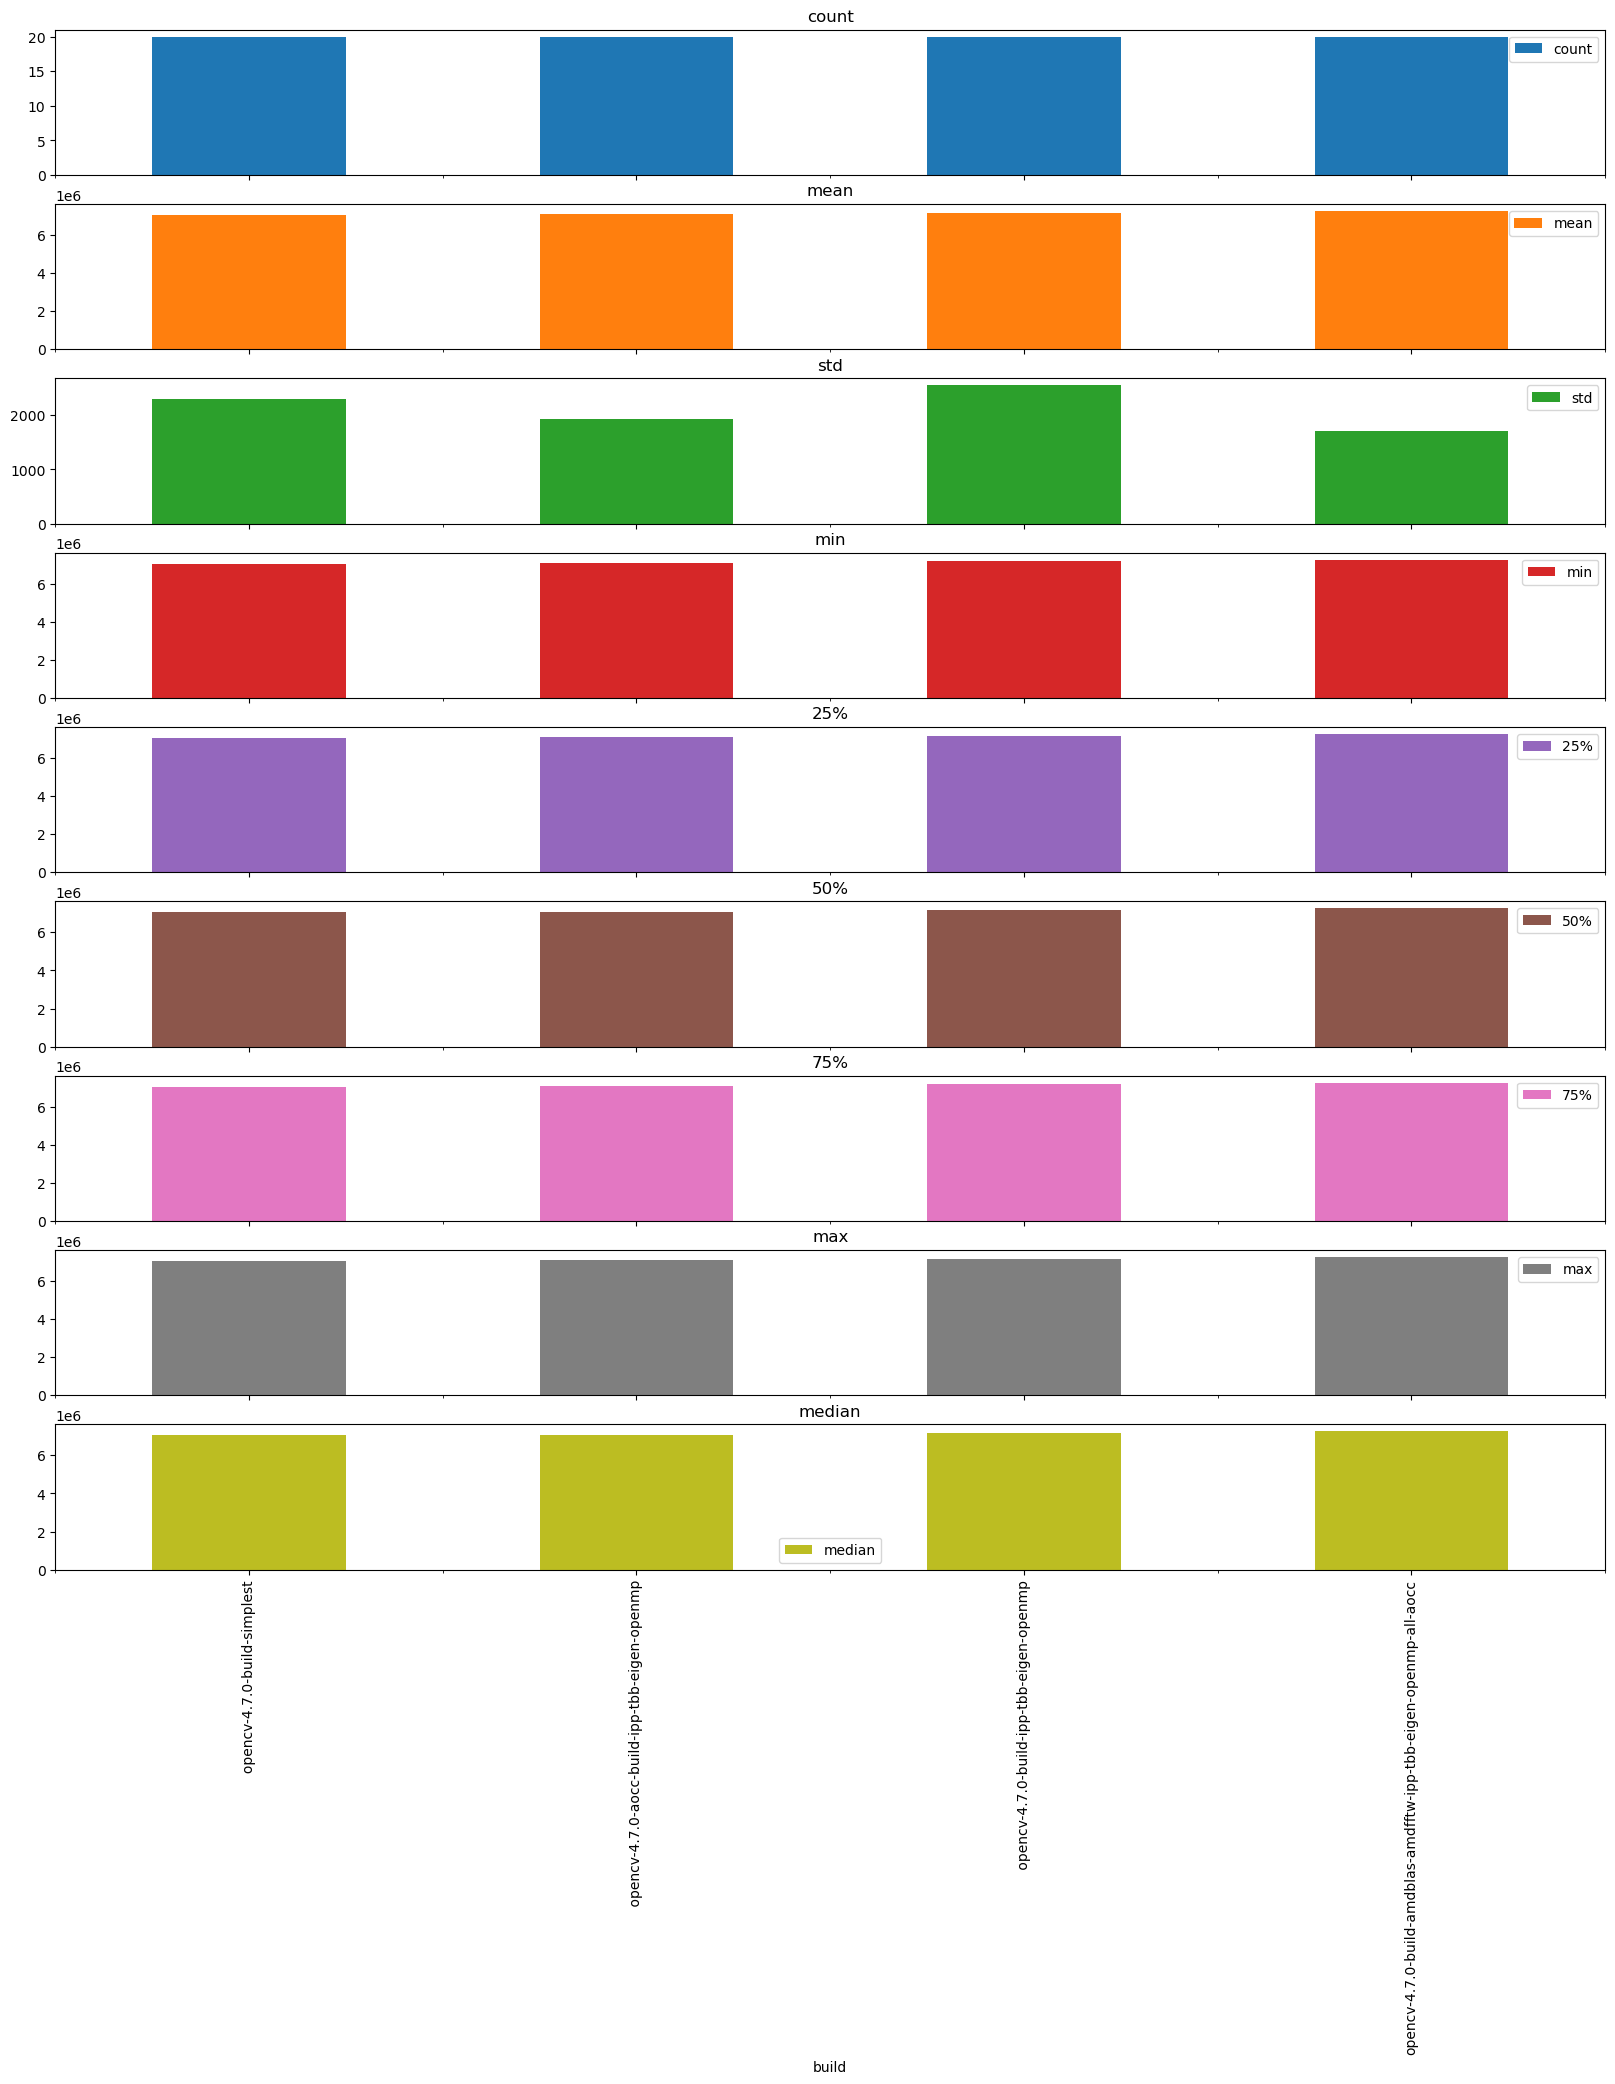

In [109]:
plt = result.plot.bar(subplots=True, figsize=(20,20))